# Modelling event times on the Santander Cycles data using graph-based mutually exciting processes (GB-MEP)
First, import the library `gb_mep`:

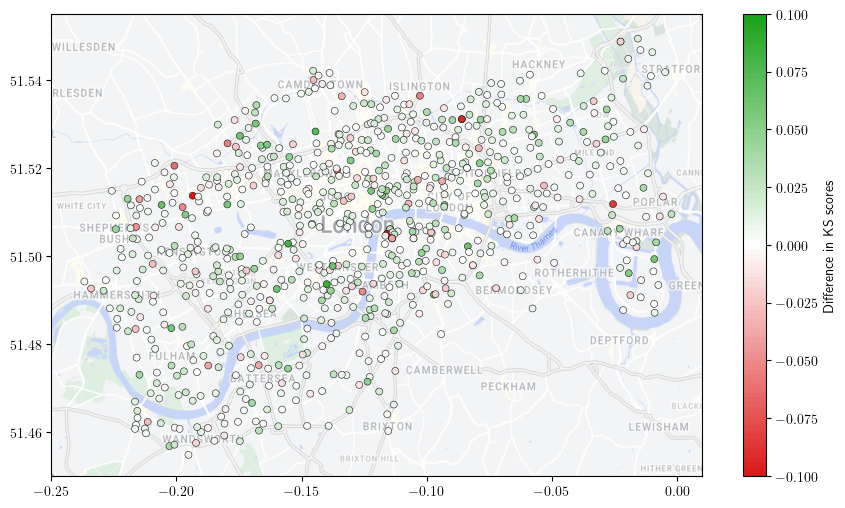

In [20]:

# Import plotting libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Lato']})
rc('text', usetex=True)

import pandas as pd
import numpy as np
import pickle
import matplotlib.colors as mcolors
# Define the custom colormap
colors = [(0.85, 0, 0), (1, 1, 1), (0, 0.6, 0)]  # Green to White to Red
n_bins = 100  # Number of color bins
cmap_name = 'centered_custom_colormap'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
norm = mcolors.TwoSlopeNorm(vmin=-.1, vcenter=0, vmax=.1)

locations = pd.read_csv('../data/santander_locations.csv')
with open('../data/santander_dictionary.pkl', 'rb') as f:
    santander_dictionary = pickle.load(f)

with open('../results/res_qq_start/ks_test.pkl', 'rb') as f:
    ks_test = pickle.load(f)

lats = []; lons = []; scor1 = []; scor2 = []
for node in ks_test['poisson']:
    lats += [locations.iloc[node].latitude]
    lons += [locations.iloc[node].longitude]
    scor1 += [ks_test['smep'][node].statistic]
    scor2 += [ks_test['gbmep_full'][node].statistic]

# Create a scatterplot with color proportional to the 'variable'
plt.figure(figsize=(10.5, 6))
scatter = plt.scatter(lons, lats, c=np.array(scor1)-np.array(scor2), cmap=custom_cmap, s=25, alpha=0.9, norm=norm, edgecolor='black', linewidth=0.4)
# Load the image you want to use as a background
background_image = mpimg.imread('London.png')
plt.imshow(background_image, extent=[-0.25, 0.01, 51.45, 51.555], aspect='auto')

# Add a colorbar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Difference in KS scores')  # Label for the colorbar

# Add labels and title
plt.xlim([-0.25, 0.01])
plt.ylim([51.45, 51.555])

# Show the plot
plt.savefig('London_Plot.pdf',bbox_inches='tight', pad_inches=0.1)
plt.show()

In [21]:
np.mean(np.array(scor1)-np.array(scor2) > 0)

0.7388535031847133

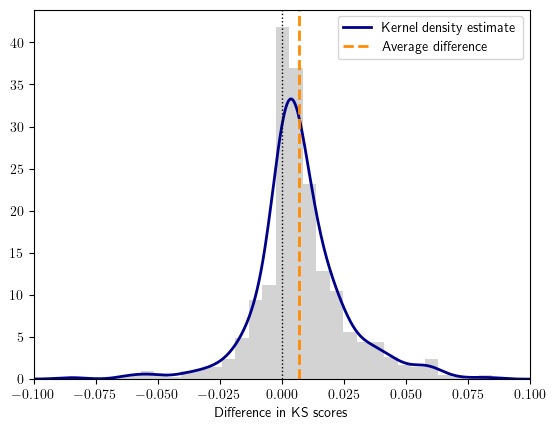

In [67]:
from scipy.stats import gaussian_kde as kde
kernel = kde(np.array(scor1)-np.array(scor2), bw_method='scott')
plt.hist(np.array(scor1)-np.array(scor2), bins=40, density=True, color='lightgray', lw=2)
x = np.linspace(-.1,.1, num=500)
plt.plot(x, kernel(x), lw=2, c='DarkBlue', label='Kernel density estimate')
plt.axvline(x=np.mean(np.array(scor1)-np.array(scor2)), ls='--', c='DarkOrange', lw=2, label='Average difference')
plt.axvline(x=0, ls='dotted', c='black', lw=1)
plt.xlabel('Difference in KS scores')
plt.xlim(-0.1,0.1)
plt.legend()
plt.savefig('hist_difference.pdf',bbox_inches='tight', pad_inches=0.1)
plt.show()